In [16]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

In [17]:
train_16 = pd.read_csv('train_2016_v2.csv',parse_dates=['transactiondate'],dtype={"parcelid": int})

In [18]:
prop_16 = pd.read_csv('properties_2016.csv',dtype={"parcelid": int})

/home/hskimim/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
train_df1 = pd.merge(train_16,prop_16,on='parcelid', how ='left')

In [52]:
train_df = train_df1.copy()

17년 데이터는 생략한 상태

## Real_estate_feature data analysis

- Title :` <real estate feature>`
- 'propertycountylandusecode'
- 'propertylandusetypeid'
- 'propertyzoningdesc'
- 'rawcensustractandblock'
- 'censustractandblock'
-  Title : `< Location feature>`
- 'latitude'
- 'longitude'
- Title : `<address feature>`
- 'fips'
- 'regionidcounty'
- 'regionidcity'
- 'regionidzip'
- 'regionidneighborhood'
- `initially, I divided three features named region, location,adress but, I'd like to try three things into one characteristic in this EDA.`

In [40]:
region_feature = [
    '부동산이 위치하는 카운티(county: Second-level administrative division)',
     '해당 부동산이있는 도시 (있는 경우)',
     '해당 부동산이 위치한 우편 번호',
    '해당 부동산이 위치한 동네',
     '주거지에있는 총 객실 수',
     '소포 중위의 위도에 10e6을 곱한 값',
     '소포 중도 경도에 10e6을 곱한 값',
    '부동산이 위치하는 카운티(county: Second-level administrative division)',
     '해당 부동산이있는 도시 (있는 경우)',
     '해당 부동산이 위치한 우편 번호',
    '해당 부동산이 위치한 동네',
    '부동산이 위치하는 카운티(county: Second-level administrative division)'

]

In [41]:
region_feature_col = [
    'propertycountylandusecode',
    'propertylandusetypeid',
    'propertyzoningdesc',
    'rawcensustractandblock',
    'censustractandblock',
    'latitude',
    'longitude',
    'fips',
    'regionidcounty',
    'regionidcity',
    'regionidzip',
    'regionidneighborhood'
    

]

In [25]:
region_df = pd.DataFrame(columns=['name','feature'])
region_df.name = region_feature_col
region_df.feature = region_feature
region_df

,name,feature
0,propertycountylandusecode,부동산이 위치하는 카운티(county: Second-level administrat...
1,propertylandusetypeid,해당 부동산이있는 도시 (있는 경우)
2,propertyzoningdesc,해당 부동산이 위치한 우편 번호
3,rawcensustractandblock,해당 부동산이 위치한 동네
4,censustractandblock,주거지에있는 총 객실 수
5,latitude,소포 중위의 위도에 10e6을 곱한 값
6,longitude,소포 중도 경도에 10e6을 곱한 값
7,fips,부동산이 위치하는 카운티(county: Second-level administrat...
8,regionidcounty,해당 부동산이있는 도시 (있는 경우)
9,regionidcity,해당 부동산이 위치한 우편 번호


In [42]:
print(train_df[region_feature_col].dtypes,end='\n\n'),
print('Number of tax_feature_col:  {}'.format(len(region_feature_col)))

propertycountylandusecode     object
propertylandusetypeid        float64
propertyzoningdesc            object
rawcensustractandblock       float64
censustractandblock          float64
latitude                     float64
longitude                    float64
fips                         float64
regionidcounty               float64
regionidcity                 float64
regionidzip                  float64
regionidneighborhood         float64
dtype: object

Number of tax_feature_col:  12


region_feature_col 의 자료형에서 propertycountylandusecode , propertyzoningdesc의 자료형이 object이므로 따로 빼두어서 저장해두겠습니다.

In [43]:
region_object_col =[]
region_object_col.append(region_feature_col.pop(0))
region_object_col.append(region_feature_col.pop(1))
region_object_col

['propertycountylandusecode', 'propertyzoningdesc']

In [30]:
print(region_feature_col , end = '\n\n\n')
print(len(region_feature_col))

['propertylandusetypeid', 'rawcensustractandblock', 'censustractandblock', 'latitude', 'longitude', 'fips', 'regionidcounty', 'regionidcity', 'regionidzip', 'regionidneighborhood']


10


## individual columns' feature analysis

### Regression plot about numerical data

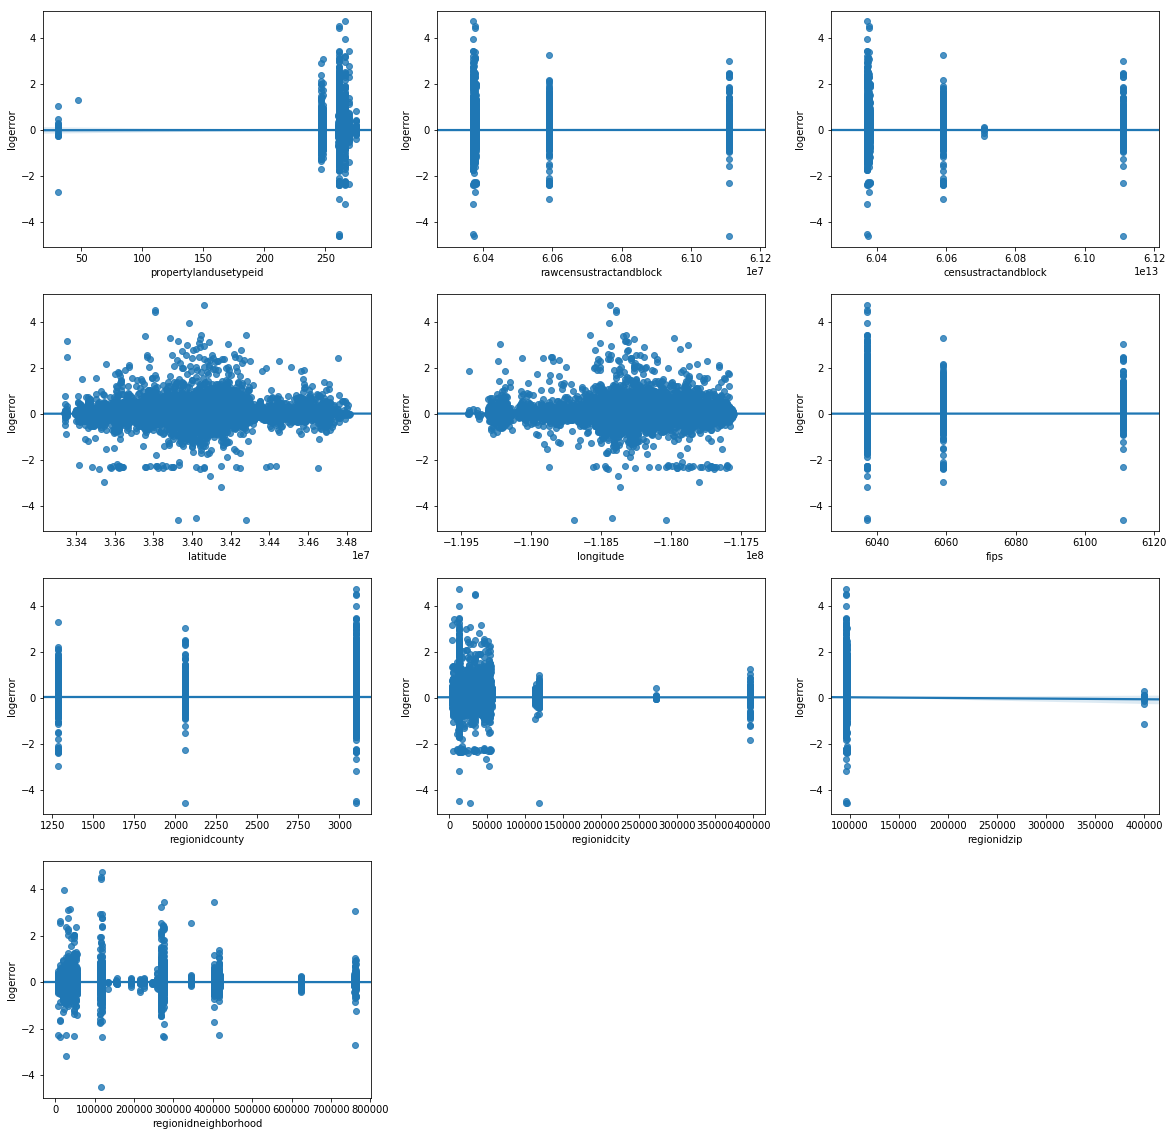

In [31]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(region_feature_col):
    plt.subplot(4,3,idx+1)
    sns.regplot(train_df[col],train_df.logerror)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

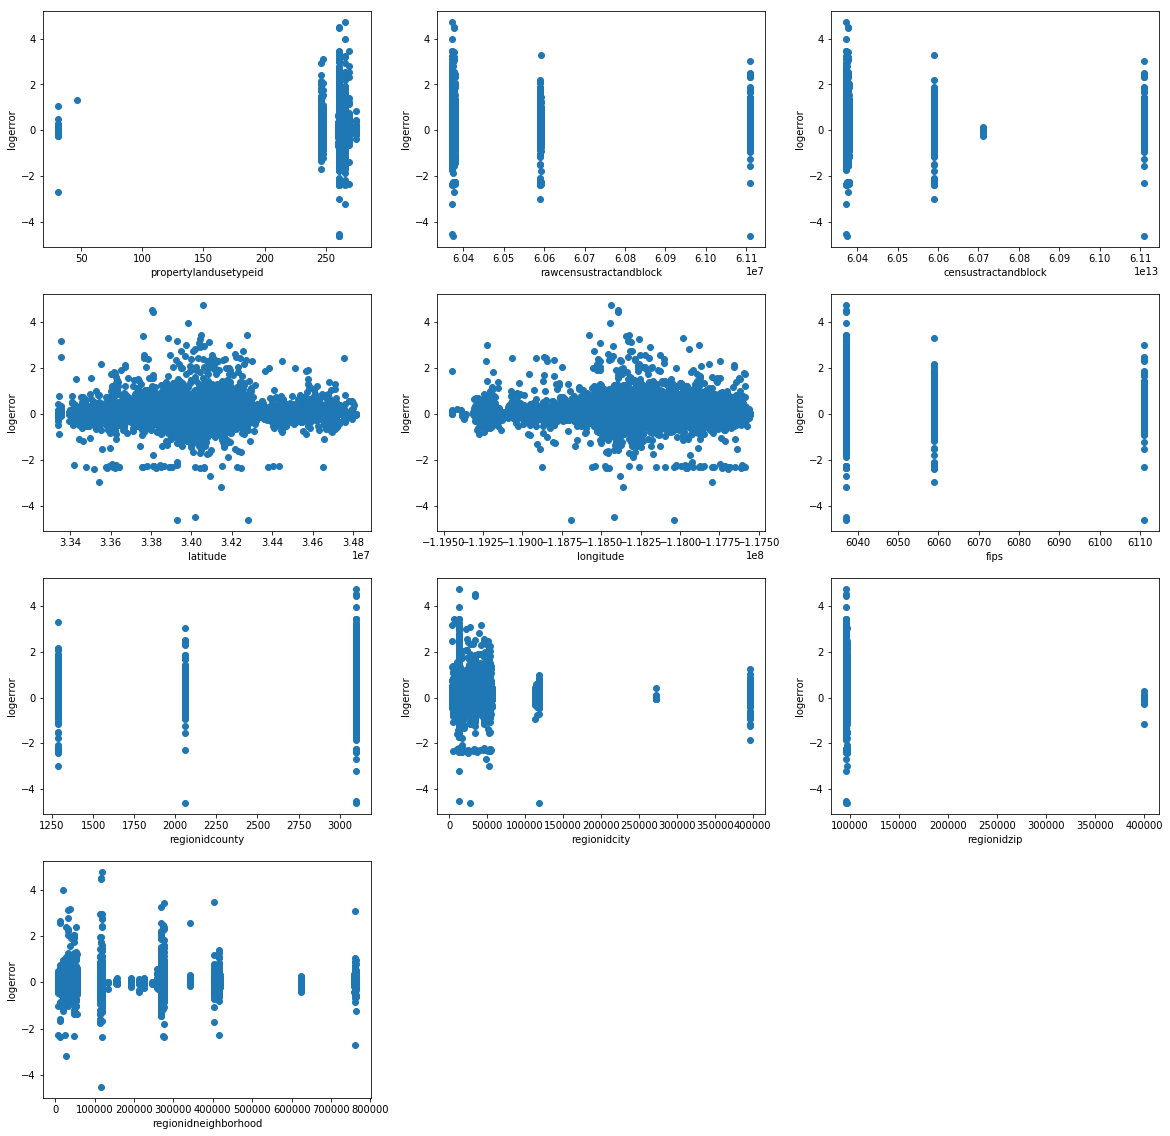

In [32]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(region_feature_col):
    plt.subplot(4,3,idx+1)
    plt.scatter(train_df[col],train_df.logerror)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

2개의 항목을 제외하고는 모두 numeric한 category를 가지는 categorical data set임을 알 수 있습니다. 이 컬럼 항목들을 위의 region_object_col 에 append시킨 후에, countplot으로 시각화해보겠습니다.

In [44]:
append_category_list = ['propertycountylandusecode',
'propertylandusetypeid','propertyzoningdesc','rawcensustractandblock', 
'censustractandblock','fips','regionidcounty','regionidcity','regionidzip',
'regionidneighborhood']
for category_list in append_category_list:
    region_object_col.append(category_list)
len(category_list)

20

In [49]:
region_feature_col

['propertylandusetypeid',
 'rawcensustractandblock',
 'censustractandblock',
 'latitude',
 'longitude',
 'fips',
 'regionidcounty',
 'regionidcity',
 'regionidzip',
 'regionidneighborhood']

In [61]:
region_object_col
len(region_object_col)

12

## Comments